### Impact of Outliers On Machine Learning!!

##### Machine Learning Models Sensitive To Outliers -

- Naive Bayes Classifier - Not Sensitive to Outliers

Reason: It calculates probabilities based on the mean and variance of the features, which can be robust to outliers in many cases.

- Support Vector Machine (SVM) - Sensitive to Outliers

Reason: Outliers can affect the placement of the margin and support vectors. However, using soft margin SVMs or techniques like robust kernels can reduce this sensitivity.

- Linear Regression - Sensitive to Outliers

Reason: Linear regression minimizes the sum of squared residuals, so outliers can disproportionately influence the model. Robust regression techniques or RANSAC can mitigate this.

- Logistic Regression - Sensitive to Outliers

Reason: Logistic regression can also be affected by extreme values in the data, especially in small datasets. Regularization techniques like L1/L2 can help.

- Decision Tree Regressor/Classifier - Not Sensitive to Outliers

Reason: Splitting decisions in trees are based on thresholds, which makes them less sensitive to extreme values.

- Ensemble Models (Random Forest, XGBoost, Gradient Boosting) - Less Sensitive to Outliers

Reason: Bagging methods like Random Forest average predictions, which dilutes the impact of outliers. Boosting algorithms are somewhat more sensitive but can handle outliers better than linear models.

- K-Nearest Neighbors (KNN) - Sensitive to Outliers

Reason: KNN relies on distances, so outliers can skew the neighbors. Feature scaling and robust distance metrics (like Manhattan distance) can help reduce sensitivity.

- K-Means Clustering - Sensitive to Outliers

Reason: The mean calculation in K-means is heavily influenced by outliers, which can shift cluster centroids.
Hierarchical Clustering - Sensitive to Outliers

Reason: Distance-based measures make it sensitive to outliers, especially in single linkage and complete linkage clustering.

- Principal Component Analysis (PCA) - Sensitive to Outliers

Reason: PCA relies on variance-covariance matrices, and outliers can dominate the variance, leading to distorted components. Robust PCA techniques can help.

- Neural Networks - Sensitive to Outliers

Reason: Neural networks can be affected during gradient-based optimization since outliers can cause large gradients. Normalizing data, using robust loss functions (e.g., Huber loss), and regularization can mitigate this.
Adjustments Summary:


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [6]:
! pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 187.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 196.9 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 273.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 353.1 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 502.3 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 623.6 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 803.7 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 793.0 kB/s eta 0:00:00


In [7]:
import seaborn as sns

C:\Users\shubh\AppData\Local\Temp\ipykernel_17536\315930958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

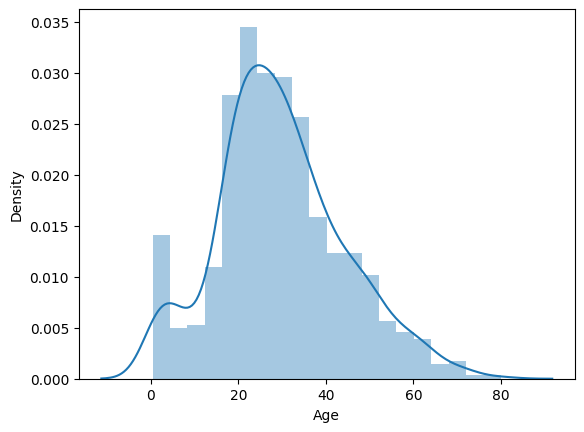

In [8]:
sns.distplot(df['Age'].dropna())

C:\Users\shubh\AppData\Local\Temp\ipykernel_17536\827162487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

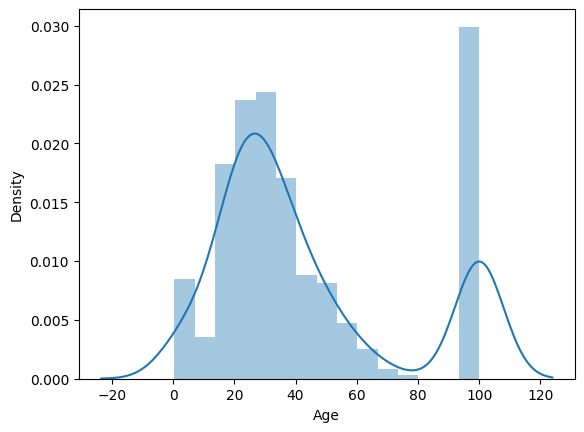

In [9]:
sns.distplot(df['Age'].fillna(100))

#### Gaussian Distributed

Text(0, 0.5, 'No of passenger')

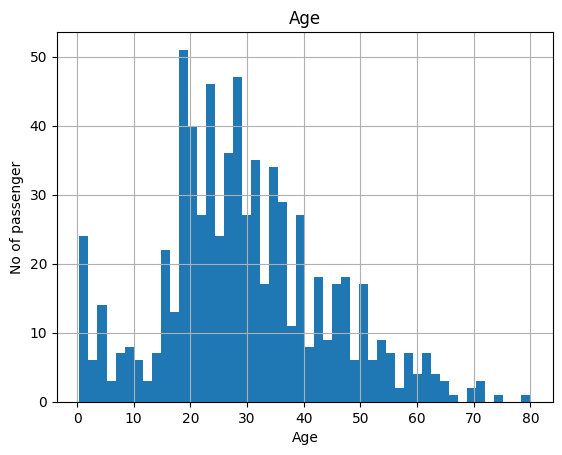

In [10]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

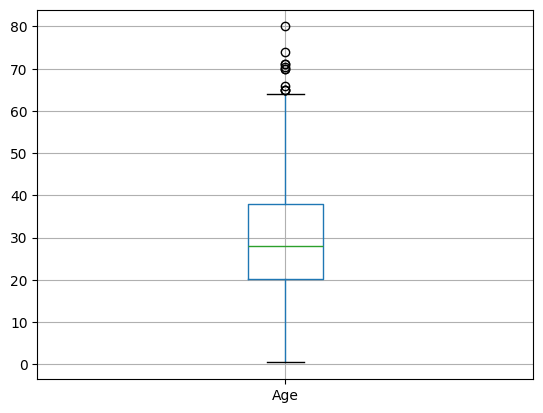

In [11]:
figure=df.boxplot(column="Age")

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### If The Data Is Normally Distributed We use this

In [13]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

#### If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passenger')

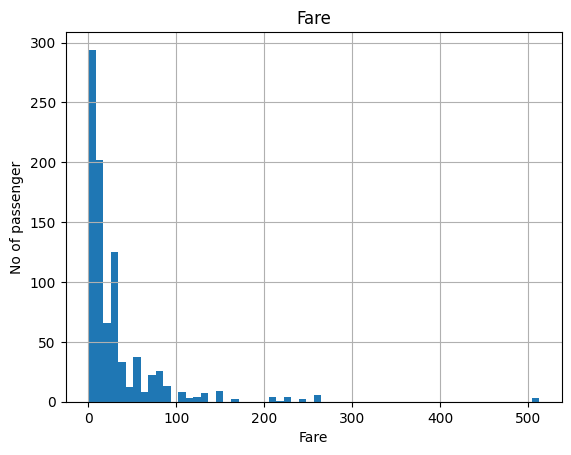

In [14]:
figure=df.Fare.hist(bins=60)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<Axes: >

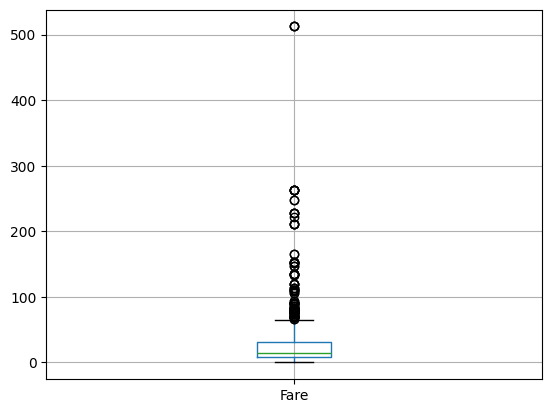

In [15]:
df.boxplot(column="Fare")

In [16]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [18]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [19]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [20]:
data=df.copy()

In [21]:
data.loc[data['Age']>=73,'Age']=73

In [22]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

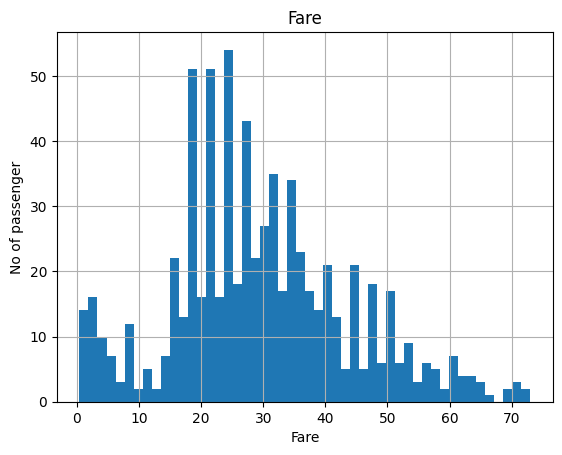

In [23]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

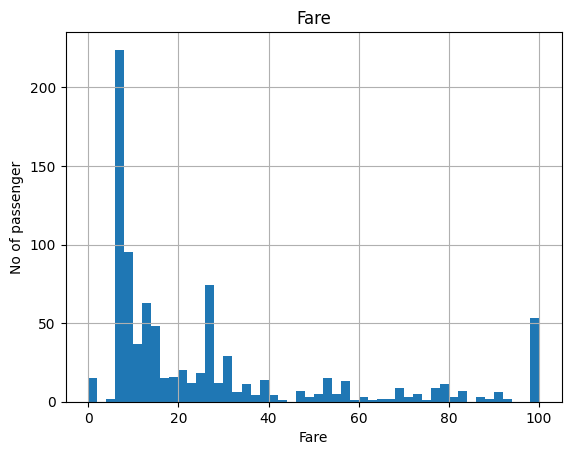

In [24]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [27]:
! pip install scikit-learn

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB 640.0 kB/s eta 0:00:18
   ---------------------------------------- 0.0/11.2 MB 326.8 kB/s eta 0:00:35
   ---------------------------------------- 0.1/11.2 MB 655.4 kB/s eta 0:00:17
   ---------------------------------------- 0.1/11.2 MB 587.0 kB/s eta 0:00:19
    --------------------------------------- 0.1/11.2 MB 774.0 kB/s eta 0:00:15
    --------------------------------------- 0.2/11.2 MB 860.2 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.2 MB 846.9 kB/s eta 0:00:13
    --------------------------------------- 0.3/11.2 MB 907.8 kB/s eta 0:00:12
   - -------------------------------------- 0.3/11.2 MB 982.3 kB/s eta 0:00:12
   - -------------------------------------- 0.4/11.2 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.4/11.2 MB 1.1 MB/s eta 0:0

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.2)

In [29]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6480446927374302
roc_auc_score: 0.7200804776739357
